<h2>Data Structure</h2>

In [218]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
import csv
from pprint import pprint

In [219]:
class WineReview:
    def __init__(self, *argv):
        self.id = argv[0]
        self.country               = argv[1]
        self.description           = argv[2]
        self.designation           = argv[3]
        self.points                = self._get_number(argv[4])
        self.price                 = self._get_float(argv[5])
        self.province              = argv[6]
        self.region_1              = argv[7]
        self.region_2              = argv[8]
        self.taster_name           = argv[9]
        self.taster_twitter_handle = argv[10]
        self.title                 = argv[11]
        self.variety               = argv[12]
        self.winery                = argv[13]

    def show(self):
        pprint(vars(self))
        
    def _get_number(self, string):
        return int(string)
        
    def _get_float(self, string):
        return float(string)
        

In [220]:
def load_reviews():
    f = open("wine-reviews/winemag-data-130k-v2.csv", 'rt')
    raw_data = list(csv.reader(f))
    columns = raw_data.pop(0)
    print(columns)
    
    reviews = dict()
    errors = list()

    for row in raw_data:
        id = int(row[0])
        try:
            review = WineReview(*row)
            reviews[id] = review
        except ValueError as e:
            errors.append(id)
            pass # wrong type        
    f.close()

    return reviews, errors

<h3>Dictionary with all WineReviews found in the .csv file and raw data<h3>

In [221]:
reviews, errors = load_reviews() 
total = len(errors)+len(reviews.keys())
p = (len(errors)/total)*100
print("cleaned type errors of {} out of {} records ({}%)".format(len(errors), total, round(p, 2)))


['', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']
cleaned type errors of 8996 out of 129971 records (6.92%)


<h3>Attributes of a WineReview object</h3>

In [222]:
try: 
    reviews[8].show()
except KeyError:
    print("erroneous data")

{'country': 'Germany',
 'description': 'Savory dried thyme notes accent sunnier flavors of preserved '
                "peach in this brisk, off-dry wine. It's fruity and fresh, "
                'with an elegant, sprightly footprint.',
 'designation': 'Shine',
 'id': '8',
 'points': 87,
 'price': 12.0,
 'province': 'Rheinhessen',
 'region_1': '',
 'region_2': '',
 'taster_name': 'Anna Lee C. Iijima',
 'taster_twitter_handle': '',
 'title': 'Heinz Eifel 2013 Shine Gewürztraminer (Rheinhessen)',
 'variety': 'Gewürztraminer',
 'winery': 'Heinz Eifel'}


<h2>Linear Regression</h2>

In [223]:
def collect_value(attribute):
    result = list()
    for k, v in reviews.items():
        result.append(vars(v)[attribute])
    
    return np.array(result)
        
    

In [229]:
X = collect_value('points')
Y = collect_value('price')

m = len(X)

X = x.reshape(m, 1)
model = LinearRegression()
model.fit(X, Y)

y_pred = model.predict(X)

w = model.coef_[0] # parameters of model
b = model.intercept_ #intercept of model

mse = mean_squared_error(Y, y_pred)
rmse = np.sqrt(mse)
r2_score = model.score(X, Y)

print(w)
print(b)

5.607501402538701
-460.46243009074493


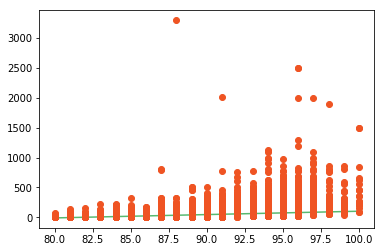

In [233]:
max_x = np.max(X)
min_x = np.min(X)

x = np.linspace(min_x, max_x, 1000)
y = b + w*x
plt.plot(x, y,'-', color="#58b970")
plt.plot(X, Y,'o', color="#ef5423")

<h4>Using Pandas</h4>

In [234]:
data = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")
print(data.shape)

(129971, 14)


In [235]:
x = data['points'].values
y = data['price'].values

# m = len(x)

# x = x.reshape(m, 1)
# model = LinearRegression()
# model.fit(x, y)

# y_pred = model.predict(x)


# mse = mean_squared_error(y, y_pred)
# rmse = np.sqrt(mse)
# r2_score = model.score(x, y)

# print(rmse)
# print(r2_score)

